<a href="https://colab.research.google.com/github/shivani-202/Biomedical-Document-Classification/blob/main/dataset02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/mentalhealthdocs.csv')
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [4]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


(None,
          Unnamed: 0
 count  53043.000000
 mean   26521.000000
 std    15312.339501
 min        0.000000
 25%    13260.500000
 50%    26521.000000
 75%    39781.500000
 max    53042.000000)

In [5]:
#filling missing text columns with an empty string
df.fillna('', inplace=True)

In [6]:
#checking for missing or empty values
df.isnull().sum()

,0
Unnamed: 0,0
statement,0
status,0


In [7]:
#check the distribution of categories in a column
print(df['status'].value_counts())

status
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64


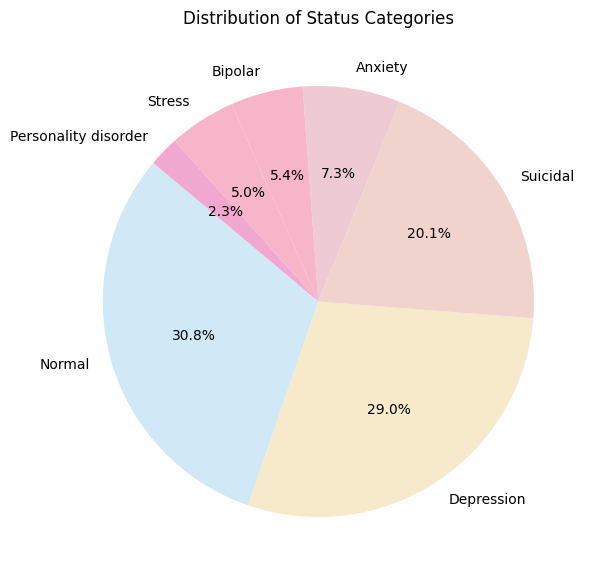

In [8]:
#count the occurrences of each category
status_counts = df['status'].value_counts()
colors = ['#D1E9F6', '#F6EACB', '#F1D3CE', '#EECAD5', '#F7B5CA', '#F7B5CA', '#F0A8D0']
plt.figure(figsize=(7, 7))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribution of Status Categories')
plt.show()

In [9]:
#Get a random statement from each group
random_statements = {}
for category in df['status'].unique():
    random_statements[category] = df[df['status'] == category]['statement'].sample().values[0]
    print(f"{category}: {random_statements[category]}")
    print()


Anxiety: selfishness  "I don't feel very good, it's like I don't belong in this world (I don't think I ever did). My friends are happy, and I'm always the one who's not really funny and who ruins the mood. So now I try to say as little as possible, people always ask me if I'm okay, if I'm tired, or worse, they say I'm scary. I think I'm just a mistake. People must find me weird or creepy, it's ruining me. A few years ago, my brother committed suicide, I felt very close to him, I think about his death all the time, I wish I could start my life over again and make the right choices (for once). What affects me the most is girls, I think... It's ridiculous, but I would love to have a relationship with a (very) pretty girl. Sometimes I think I've suffered so much that I would at least deserve that. I saw the damage my brother's death caused in my family, now I think if I didn't have a family to make suffer =&gt; suicide. My message is so selfish, and I know it. Thank you for reading these f

In [10]:
#descriptive statistics
#count the number of words in text columns

df['word_count'] = df['statement'].apply(lambda x: len(str(x).split()))
df.head(), df['word_count'].describe()

(   Unnamed: 0                                          statement   status  \
 0           0                                         oh my gosh  Anxiety   
 1           1  trouble sleeping, confused mind, restless hear...  Anxiety   
 2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety   
 3           3  I've shifted my focus to something else but I'...  Anxiety   
 4           4  I'm restless and restless, it's been a month n...  Anxiety   
 
    word_count  
 0           3  
 1          10  
 2          14  
 3          11  
 4          14  ,
 count    53043.000000
 mean       112.386460
 std        163.441356
 min          0.000000
 25%         15.000000
 50%         61.000000
 75%        147.500000
 max       6300.000000
 Name: word_count, dtype: float64)

{'Mean': 112.38646004185284, 'Median': 61.0, 'Mode': 5, 'Variance': 26713.076975898184, 'Standard Deviation': 163.44135638172546, '25th Percentile (Q1)': 15.0, '75th Percentile (Q3)': 147.5, 'IQR': 132.5, 'Lower Bound': -183.75, 'Upper Bound': 346.25, 'Number of Outliers': 3481}


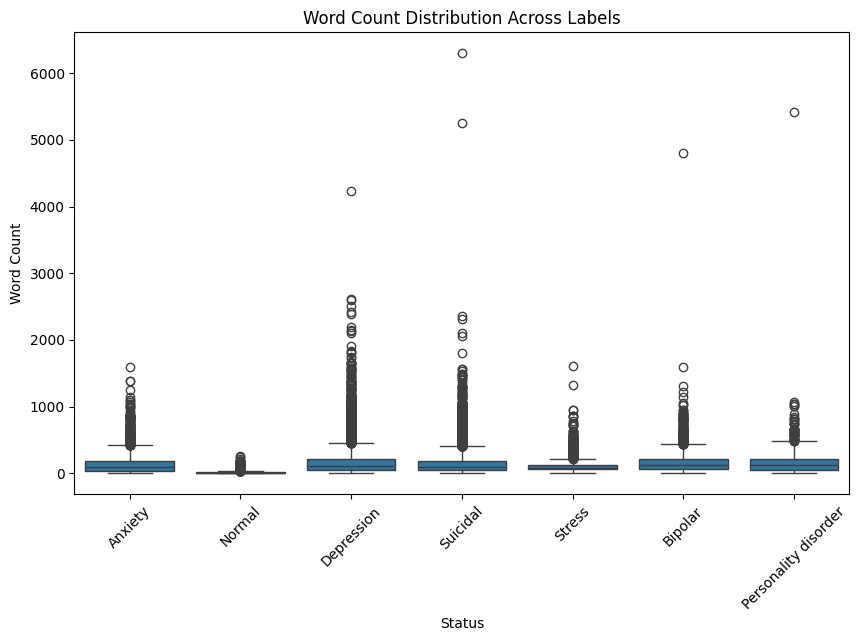

In [11]:
# Calculate statistics for word count
word_count_mode = df['word_count'].mode()[0]
word_count_variance = df['word_count'].var()
Q1 = df['word_count'].quantile(0.25)
Q3 = df['word_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['word_count'] < lower_bound) | (df['word_count'] > upper_bound)]

# Summary of statistics
word_count_summary = {
    'Mean': df['word_count'].mean(),
    'Median': df['word_count'].median(),
    'Mode': word_count_mode,
    'Variance': word_count_variance,
    'Standard Deviation': df['word_count'].std(),
    '25th Percentile (Q1)': Q1,
    '75th Percentile (Q3)': Q3,
    'IQR': IQR,
    'Lower Bound': lower_bound,
    'Upper Bound': upper_bound,
    'Number of Outliers': len(outliers)
}

print(word_count_summary)

# Box plot for word count distribution across labels
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='word_count', data=df)
plt.xlabel('Status')
plt.ylabel('Word Count')
plt.title('Word Count Distribution Across Labels')
plt.xticks(rotation=45)
plt.show()




*   Heavily skewed data: The boxplot shows that most of the documents have a relatively low word count, but there are several documents with very high word counts, creating a long upper tail.
*   Outliers: Many documents have unusually high word counts compared to the rest, which are identified as outliers. These might require further inspection to decide whether they are legitimate data points or if they should be excluded for specific analyses.



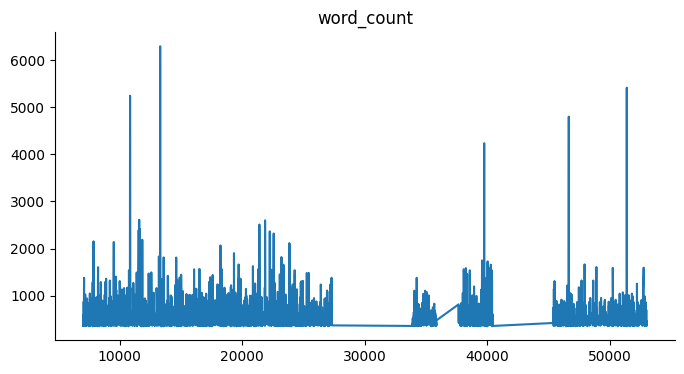

In [12]:
#word_count

from matplotlib import pyplot as plt
outliers['word_count'].plot(kind='line', figsize=(8, 4), title='word_count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [13]:
#outlier removal
df_cleaned = df[~df['word_count'].isin(outliers['word_count'])]
df_cleaned.head()

,Unnamed: 0,statement,status,word_count
0,0,oh my gosh,Anxiety,3
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,10
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,14
3,3,I've shifted my focus to something else but I'...,Anxiety,11
4,4,"I'm restless and restless, it's been a month n...",Anxiety,14


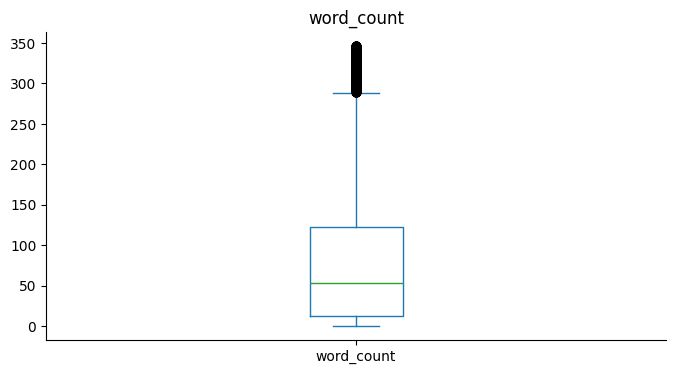

In [14]:
#outlier boxplot
df_cleaned['word_count'].plot(kind='box', figsize=(8, 4), title='word_count')
plt.gca().spines[['top', 'right']].set_visible(False)

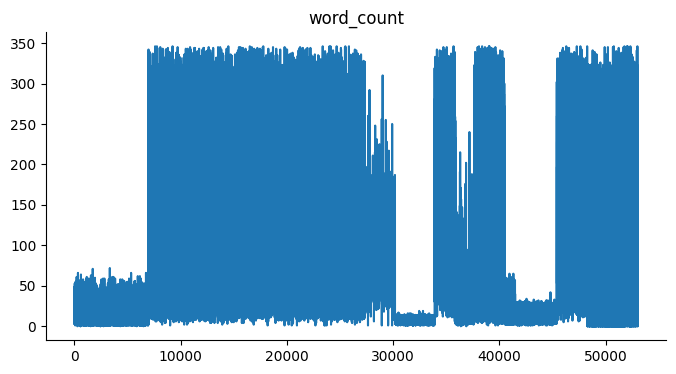

In [15]:
# word_count

from matplotlib import pyplot as plt
df_cleaned['word_count'].plot(kind='line', figsize=(8, 4), title='word_count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [17]:
#check for null values after cleaning
print(df_cleaned.isnull().sum())

Unnamed: 0    0
statement     0
status        0
word_count    0
dtype: int64


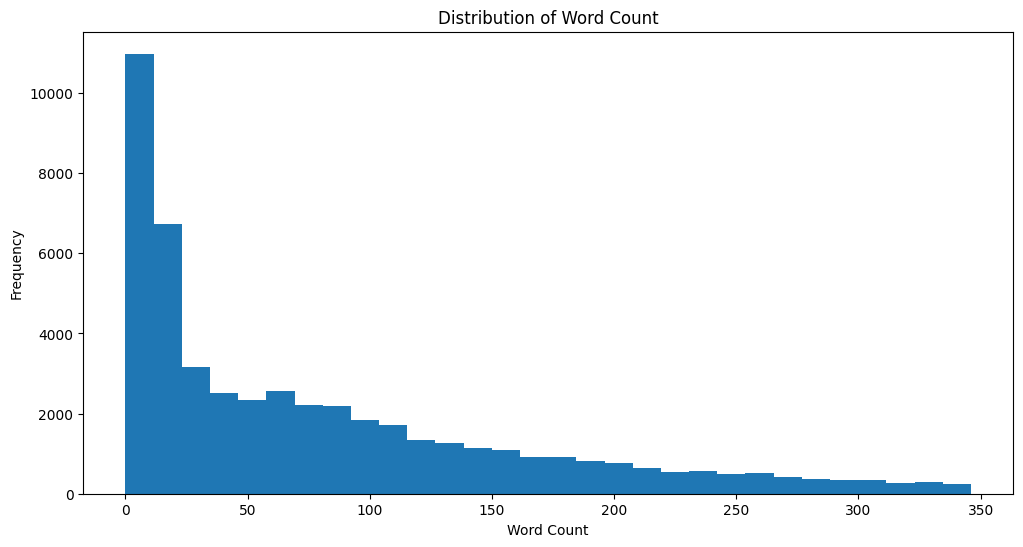

In [16]:
#distribution patterns
plt.figure(figsize=(12,6))
plt.hist(df_cleaned['word_count'], bins=30)
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Mean of word count
sample_mean = df_cleaned['word_count'].mean()
print(f'Sample Mean: {sample_mean}')

# Percentiles
percentile_25 = np.percentile(df_cleaned['word_count'], 25)
percentile_75 = np.percentile(df_cleaned['word_count'], 75)
print(f'25th Percentile: {percentile_25}, 75th Percentile: {percentile_75}')

# Median and third quartile
median = df_cleaned['word_count'].median()
Q3 = np.percentile(df_cleaned['word_count'], 75)
print(f'Median: {median}, Third Quartile (Q3): {Q3}')


Sample Mean: 80.89070255437633
25th Percentile: 13.0, 75th Percentile: 123.0
Median: 53.0, Third Quartile (Q3): 123.0


In [19]:
# Trimmed mean
import scipy.stats as stats
def trim_mean(data, proportiontocut):
    trimmed_data = stats.trim_mean(data, proportiontocut)
    return trimmed_data
trim_fraction = 0.1  # Adjust this based on the desired level of trimming
trimmed_mean = trim_mean(df_cleaned['word_count'], proportiontocut=trim_fraction)
print(f'Trimmed Mean: {trimmed_mean}')

#Trimmed median
trimmed_median = stats.trim_mean(df_cleaned['word_count'], proportiontocut=trim_fraction)
print(f'Trimmed Median: {trimmed_median}')

# Standard deviation
trimmed_std = df_cleaned['word_count'].std()
print(f'Trimmed Standard Deviation: {trimmed_std}')


Trimmed Mean: 67.42370744010088
Trimmed Median: 67.42370744010088
Trimmed Standard Deviation: 82.62537444199039


In [31]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_statement(statement):
    # Convert to lowercase, tokenize, remove punctuation and stopwords, and lemmatize
    tokens = word_tokenize(statement.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to the 'statement' column and create a new 'processed_statement' column
df_cleaned['processed_statement'] = df_cleaned['statement'].apply(preprocess_statement)

# Display first few rows of 'statement' and 'processed_statement' columns
print(df_cleaned[['statement', 'processed_statement']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                           statement  \
0                                         oh my gosh   
1  trouble sleeping, confused mind, restless hear...   
2  All wrong, back off dear, forward doubt. Stay ...   
3  I've shifted my focus to something else but I'...   
4  I'm restless and restless, it's been a month n...   

                                 processed_statement  
0                                            oh gosh  
1  trouble sleeping confused mind restless heart ...  
2  wrong back dear forward doubt stay restless re...  
3         shifted focus something else still worried  
4                   restless restless month boy mean  


<ipython-input-31-a758129043d3>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['processed_statement'] = df_cleaned['statement'].apply(preprocess_statement)


In [32]:
import numpy as np
from imblearn.over_sampling import SMOTE
from gensim.models import Word2Vec
from collections import Counter

X = df_cleaned['processed_statement']
y = df_cleaned['status']

# Convert text to word embeddings using Word2Vec
w2v_model = Word2Vec(sentences=[text.split() for text in X], vector_size=100, min_count=1, sg=1)  # Or load a pre-trained model

# Function to create document embeddings by averaging word embeddings
def get_document_embedding(text):
    words = text.split()
    word_vectors = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(w2v_model.vector_size)

# Convert each text to its document embedding
X_embeddings = np.array([get_document_embedding(text) for text in X])

# Apply SMOTE to the document embeddings
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_embeddings, y)

print("Original class distribution:", Counter(y))
print("Resampled class distribution:", Counter(y_resampled))


Original class distribution: Counter({'Normal': 16351, 'Depression': 13713, 'Suicidal': 9677, 'Anxiety': 3574, 'Bipolar': 2581, 'Stress': 2579, 'Personality disorder': 1087})
Resampled class distribution: Counter({'Anxiety': 16351, 'Normal': 16351, 'Depression': 16351, 'Suicidal': 16351, 'Stress': 16351, 'Bipolar': 16351, 'Personality disorder': 16351})


In [30]:
# Create a new DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled)
df_resampled['status'] = y_resampled

# Display the head of the new DataFrame
print(df_resampled.head())

# Display the value counts of the 'status' column in the new DataFrame
print(df_resampled['status'].value_counts())

          0         1         2         3         4         5         6  \
0 -0.211562 -0.483746 -0.086209 -0.055648  0.196241 -0.493104 -0.122763   
1 -0.004365 -0.579635 -0.223664  0.113992  0.202603 -0.515251 -0.137527   
2 -0.158134 -0.530562 -0.269704  0.094087  0.279413 -0.335144 -0.156702   
3 -0.168373 -0.594769 -0.246838  0.192837  0.194894 -0.343164 -0.120035   
4 -0.307244 -0.556358 -0.171838  0.127308  0.378775 -0.297043 -0.154948   

          7         8         9  ...        91        92        93        94  \
0  0.295257  0.250579  0.034602  ...  0.218984 -0.268155 -0.207359  0.092828   
1  0.501741  0.267280  0.100161  ...  0.195148 -0.224599 -0.185169  0.143154   
2  0.453383  0.262271  0.027977  ...  0.112790 -0.108019 -0.075929  0.104241   
3  0.350761  0.285667  0.074447  ...  0.243421 -0.252013  0.092483  0.132041   
4  0.347589  0.119611  0.072609  ...  0.266676 -0.196419 -0.023968  0.093327   

         95        96        97        98        99   status  
0  0.

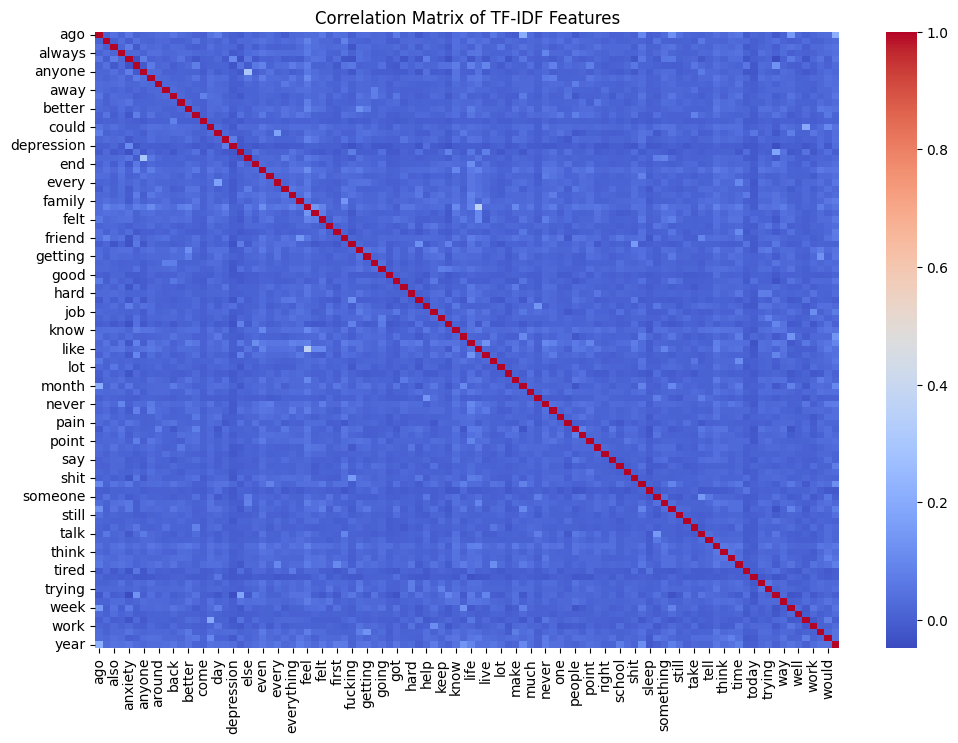

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Apply TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=100)  # Limit to top 100 features (words)
tfidf_matrix = tfidf.fit_transform(df_cleaned['processed_statement'])

# Convert the TF-IDF matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Compute the correlation matrix
correlation_matrix = tfidf_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of TF-IDF Features')
plt.show()


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, log_loss, matthews_corrcoef, cohen_kappa_score, balanced_accuracy_score
)
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold

X = df_cleaned['processed_statement']
y = df_cleaned['status']

# # TF-IDF Vectorization
# vectorizer = TfidfVectorizer()
# X_tfidf = vectorizer.fit_transform(X)

# # Apply Variance Threshold for feature selection
# variance_threshold = VarianceThreshold(0.001)
# X_tfidf_selected = variance_threshold.fit_transform(X_tfidf).toarray()

# # Convert to DataFrame for additional feature selection
# X_tfidf_df = pd.DataFrame(X_tfidf_selected, columns=vectorizer.get_feature_names_out()[variance_threshold.get_support()])



# Function to run experiments with cross-validation and different train-test splits
def run_experiment(model, model_name, X_tfidf, y):
    results = []
    splits = [(0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]

    for train_size, test_size in splits:
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=42)

        # Label Encoding for target variable
        le = LabelEncoder()
        y_train = le.fit_transform(y_train)
        y_test = le.transform(y_test)

        # Cross-validated predictions on training set
        y_pred = cross_val_predict(model, X_train, y_train, cv=5)

        # Train on full training data and predict on test set
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)

        # Check if model supports predict_proba
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)
            auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
            loss = log_loss(y_test, y_prob)
        else:
            auc = 'N/A'
            loss = 'N/A'

        # Gather metrics
        metrics = {
            'Model': model_name,
            'Train-Test Split': f"{int(train_size*100)}-{int(test_size*100)}",
            'Accuracy': accuracy_score(y_test, y_test_pred),
            'Precision': precision_score(y_test, y_test_pred, average='macro'),
            'Recall': recall_score(y_test, y_test_pred, average='macro'),
            'F1-Score': f1_score(y_test, y_test_pred, average='macro'),
            'Balanced Accuracy': balanced_accuracy_score(y_true, y_pred),
            'AUC-ROC': auc,
            'Log-Loss': loss,
            'MCC': matthews_corrcoef(y_test, y_test_pred),
            'Cohen\'s Kappa': cohen_kappa_score(y_test, y_test_pred),
            'Confusion Matrix': confusion_matrix(y_test, y_test_pred)
        }

        results.append(metrics)

    return results

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Multinomial NB': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Ensemble (Voting)': VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=1000)),
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('svm', SVC(kernel='linear', probability=True))
        ],
        voting='soft'
    )
}

# Run experiments for each model and collect results
all_results = []
for name, model in models.items():
    print(f"Running experiments for {name}...")
    results = run_experiment(model, name, X_tfidf_selected, y)
    all_results.extend(results)

# Convert results to a DataFrame
metrics_df = pd.DataFrame(all_results).drop(columns=['Confusion Matrix'])
print(metrics_df)

# Plot confusion matrices for each model and split
fig, axes = plt.subplots(len(models), 4, figsize=(20, 20))
fig.suptitle("Confusion Matrices for Different Models and Train-Test Splits", fontsize=16)

for i, (name, model) in enumerate(models.items()):
    results = [res for res in all_results if res['Model'] == name]
    for j, result in enumerate(results):
        cm = result['Confusion Matrix']
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i, j])
        axes[i, j].set_title(f"{name} {result['Train-Test Split']}")
        axes[i, j].set_xlabel('Predicted Labels')
        axes[i, j].set_ylabel('True Labels')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


NameError: name 'df_cleaned' is not defined

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, log_loss, matthews_corrcoef, cohen_kappa_score
)
X_tfidf = tfidf_df
y = df['status']  # Labels (mental health conditions)

# Function to run experiments with different algorithms and evaluation metrics
def run_experiment(model, model_name):
    results = {}

    for split in [(0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]:
        X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=split[1], random_state=42)

        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Check if model supports predict_proba
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)
        else:
            y_prob = None  # No probability predictions available

        # Collect all evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        # Use ROC-AUC and Log-Loss only if probability predictions are available
        auc = roc_auc_score(y_test, y_prob, multi_class='ovr') if y_prob is not None else 'N/A'
        loss = log_loss(y_test, y_prob) if y_prob is not None else 'N/A'

        cm = confusion_matrix(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        kappa = cohen_kappa_score(y_test, y_pred)

        results[split] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'AUC-ROC': auc,
            'Confusion Matrix': cm,
            'Log-Loss': loss,
            'MCC': mcc,
            'Cohen\'s Kappa': kappa
        }

    return results

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Multinomial NB': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True)
}

# Running experiments for all models
for name, model in models.items():
    print(f"Running experiments for {name}...")
    results = run_experiment(model, name)

    # Display the results
    for split, metrics in results.items():
        print(f"\nTrain-Test Split: {split[0]*100}-{split[1]*100}")
        for metric, value in metrics.items():
            print(f"{metric}: {value}")


Running experiments for Logistic Regression...

Train-Test Split: 50.0-50.0
Accuracy: 0.6681967213114755
Precision: 0.6620099762553197
Recall: 0.6646529880474377
F1-Score: 0.6608316975289197
AUC-ROC: 0.8804171448045384
Confusion Matrix: [[1079  189  225   21]
 [ 223  987  171  398]
 [ 113   53 1371   24]
 [  41  461  105  639]]
Log-Loss: 0.7921528570585584
MCC: 0.5561001283280116
Cohen's Kappa: 0.5547435942099357

Train-Test Split: 60.0-40.0
Accuracy: 0.6727459016393442
Precision: 0.6670380495499011
Recall: 0.6684314638784886
F1-Score: 0.6647339196584248
AUC-ROC: 0.8809355927531243
Confusion Matrix: [[ 870  145  173   18]
 [ 183  804  140  298]
 [  76   43 1109   20]
 [  30  387   84  500]]
Log-Loss: 0.7893405006301598
MCC: 0.5621334038160333
Cohen's Kappa: 0.56057223223336

Train-Test Split: 70.0-30.0
Accuracy: 0.6669398907103825
Precision: 0.6623971986092119
Recall: 0.6631209332945719
F1-Score: 0.6593183461745981
AUC-ROC: 0.8797561449033783
Confusion Matrix: [[641 103 132  16]
 [150 

status
Depression    3500
Normal        3200
Anxiety       3000
Suicidal      2500
Name: count, dtype: int64
Anxiety: Problems with stomach and I feel like I'm about to fall apart... Recently, I began having problems with my stomach and I'm paranoid/panicking that they are something worse.  


I'm 20, Asian, overweight (195 at 5'11), and I'm worried that the symptoms I have are something really bad- abdominal pain, gas issues, constipation, diarrhea, and yellow, runny stool that I don't know where it came from.  


Has anyone have symptoms like this? Do they know where they came from and why? Is it a sign of something bad? Because I'm on the verge of panicking right now and need to know.
Depression: I thought I had a handle of it. I was creeping away from the edge for a long time but the past couple months my head space has shifted and I cannot pull myself out of it for more than a day.I keep putting everything I have learnt into practice. It makes me feel a bit better for a short time

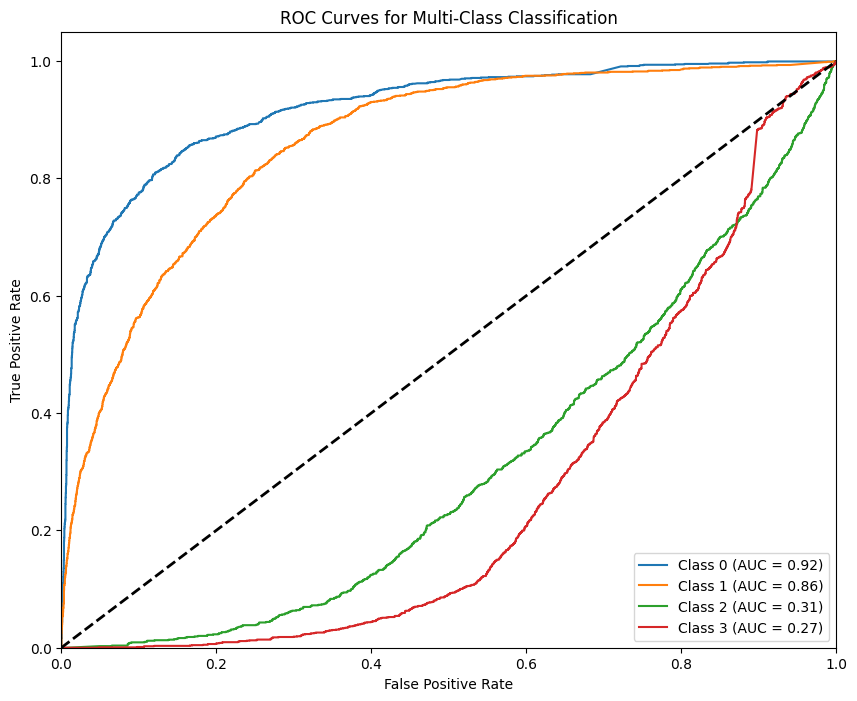

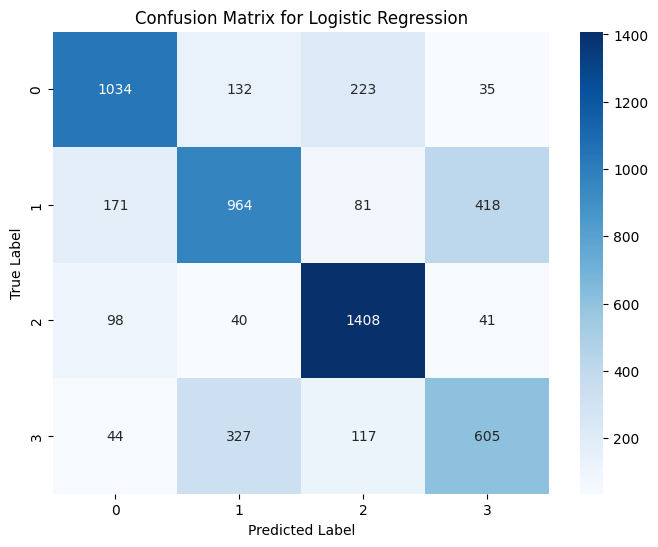

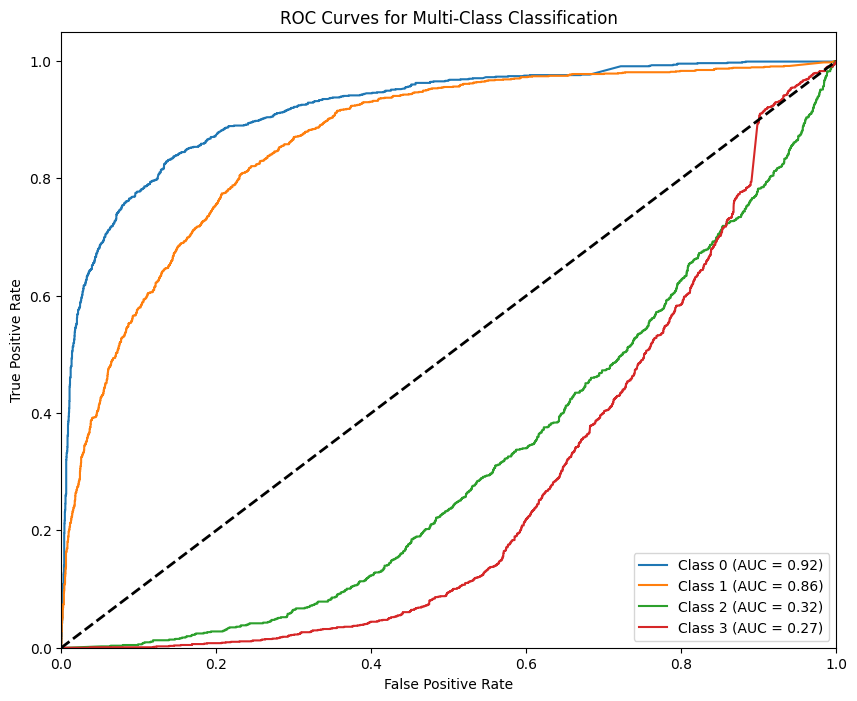

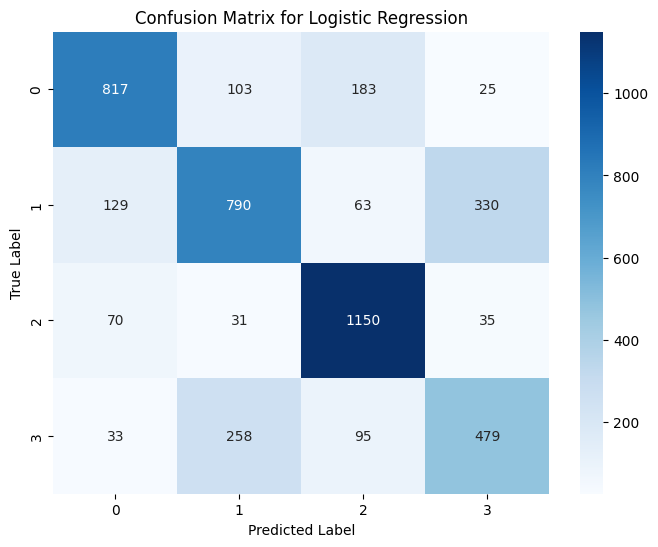

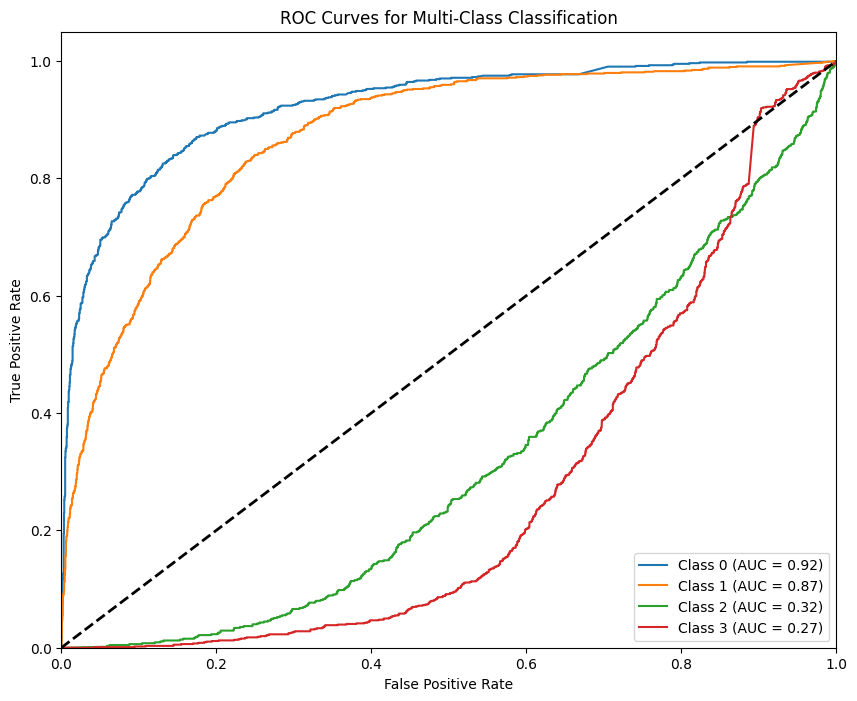

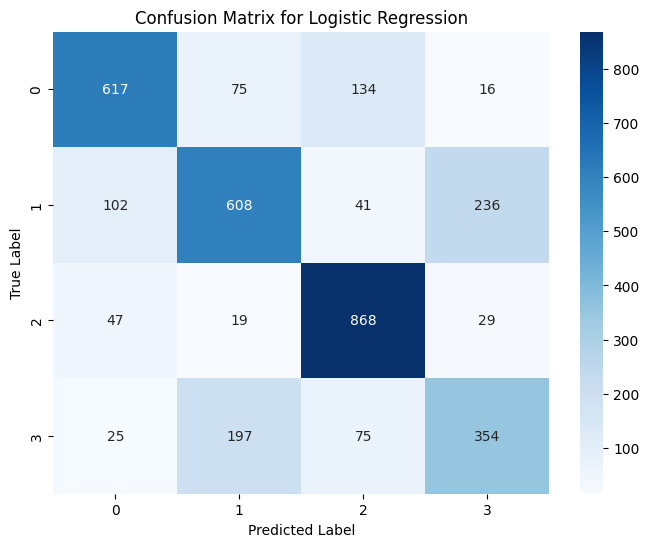

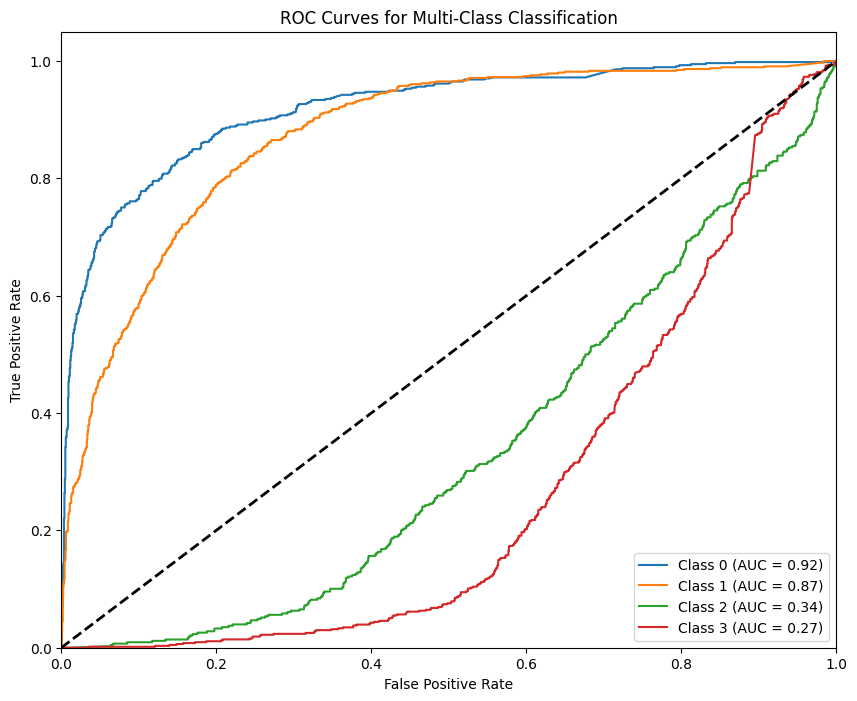

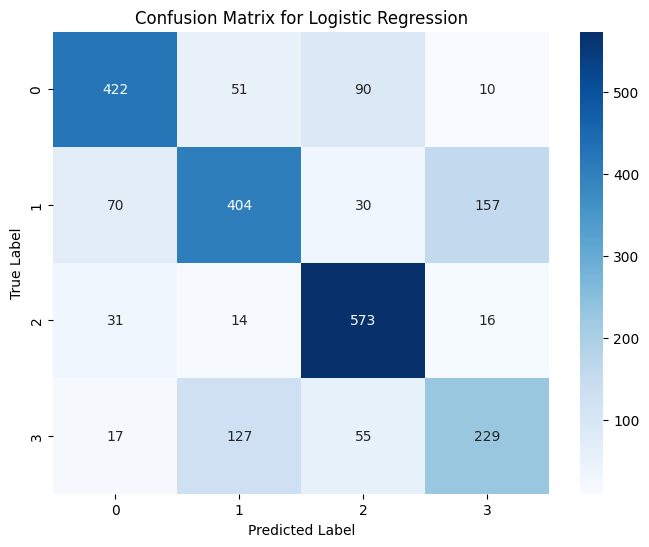


Train-Test Split: 50.0-50.0
Accuracy: 0.6990240501917044
Precision: 0.6867179575377186
Recall: 0.6892044651995362
F1-Score: 0.6863005463715972
AUC-ROC: 0.5885008427249003
Confusion Matrix: [[1034  132  223   35]
 [ 171  964   81  418]
 [  98   40 1408   41]
 [  44  327  117  605]]
MCC: 0.5968727580931822
Cohen's Kappa: 0.5957299369651222

Train-Test Split: 60.0-40.0
Accuracy: 0.7048573295578305
Precision: 0.6924246050757508
Recall: 0.6936069687723655
F1-Score: 0.691201588531137
AUC-ROC: 0.5925405759670472
Confusion Matrix: [[ 817  103  183   25]
 [ 129  790   63  330]
 [  70   31 1150   35]
 [  33  258   95  479]]
MCC: 0.6043746459507987
Cohen's Kappa: 0.6031160038774759

Train-Test Split: 70.0-30.0
Accuracy: 0.7107173976183561
Precision: 0.6975497528726259
Recall: 0.6984789881698047
F1-Score: 0.6962934650416563
AUC-ROC: 0.5958049713432207
Confusion Matrix: [[617  75 134  16]
 [102 608  41 236]
 [ 47  19 868  29]
 [ 25 197  75 354]]
MCC: 0.6120021609997708
Cohen's Kappa: 0.61079686002

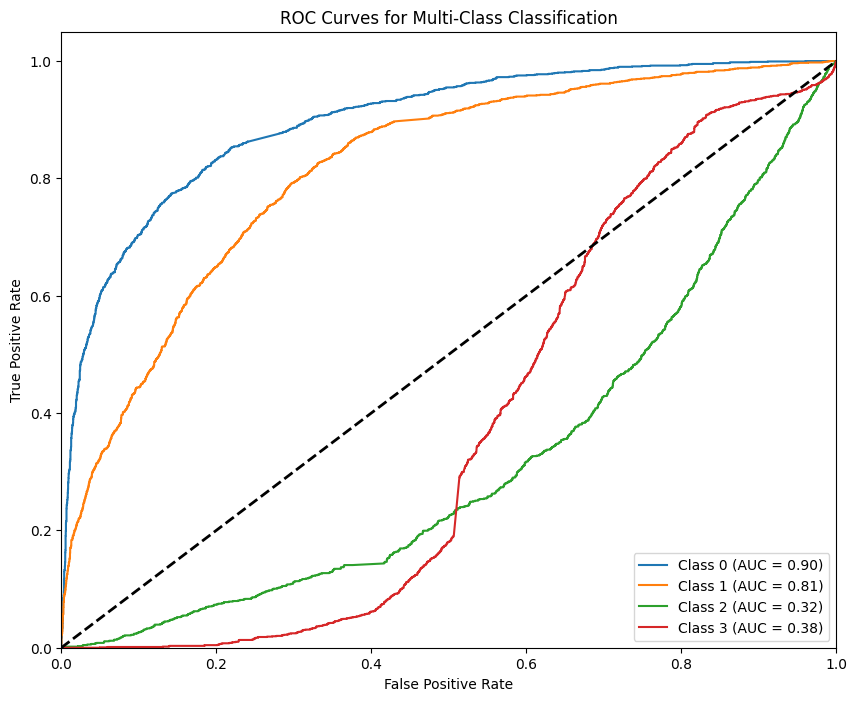

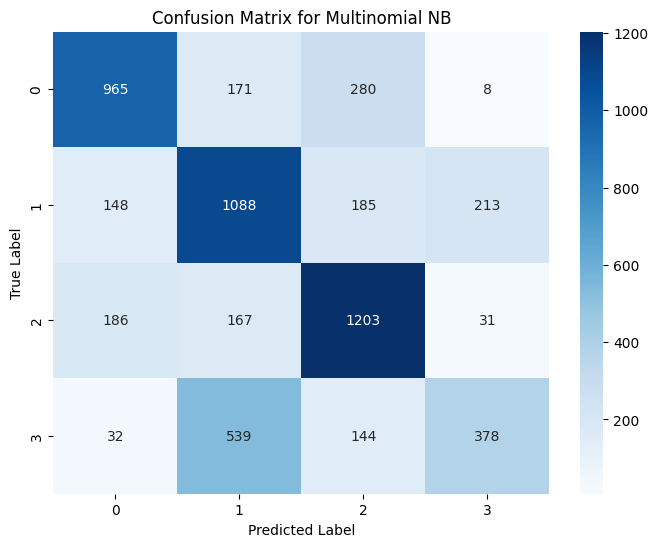

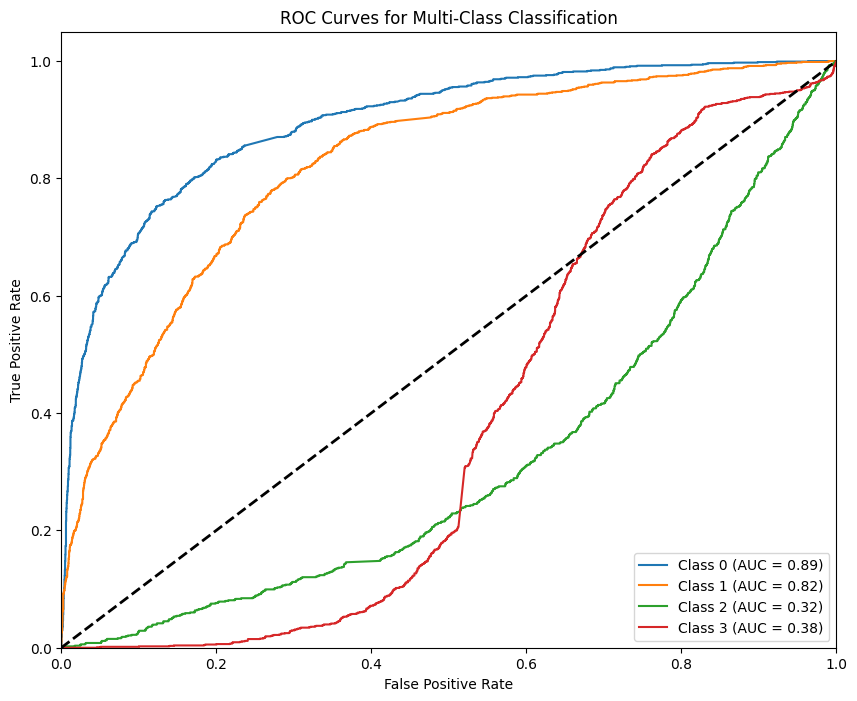

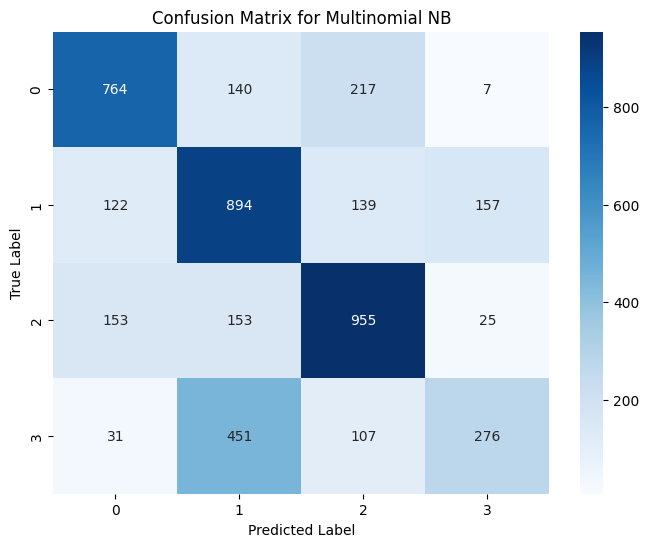

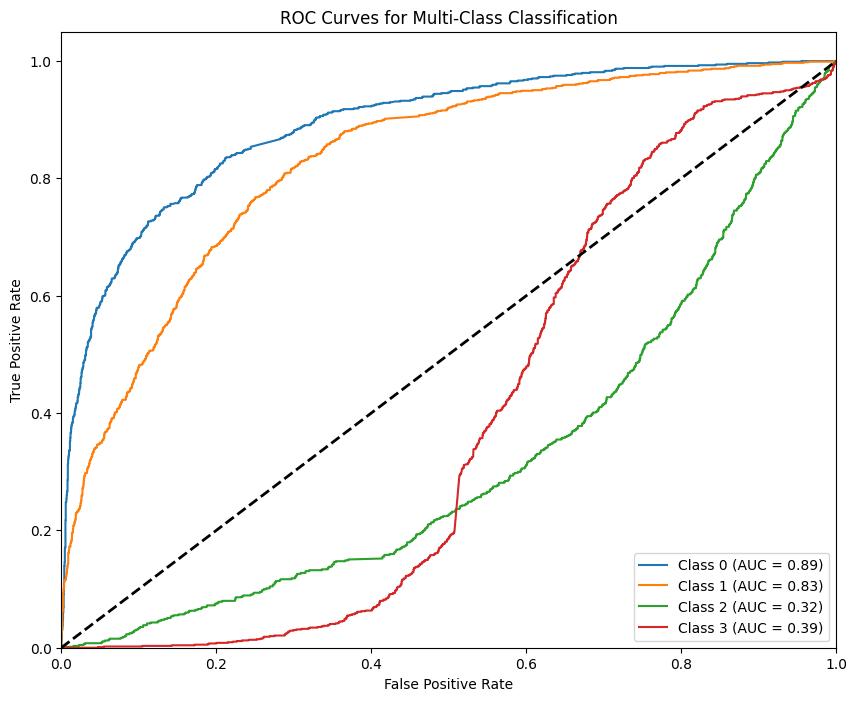

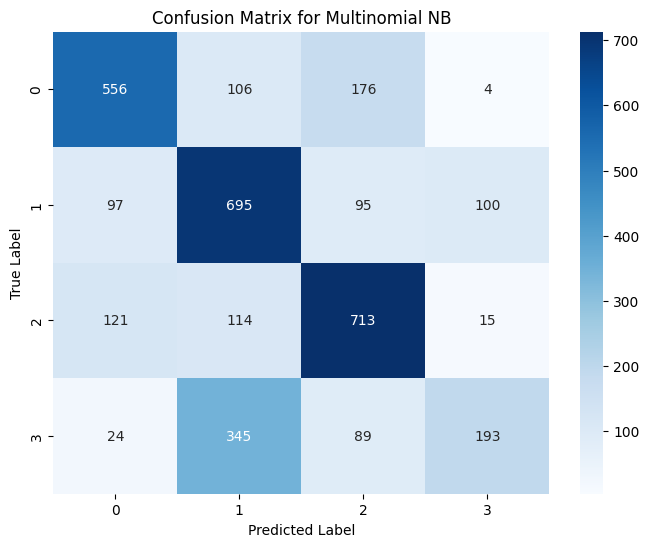

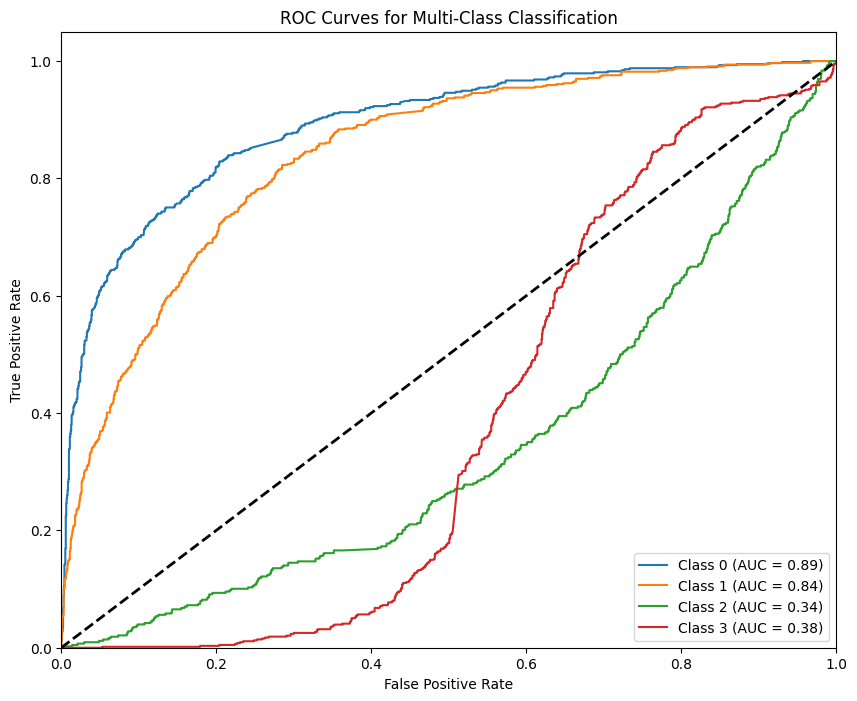

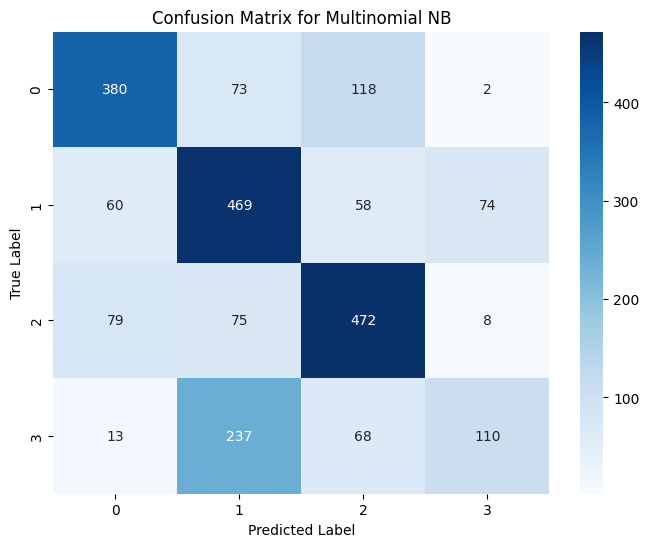


Train-Test Split: 50.0-50.0
Accuracy: 0.6333217148832345
Precision: 0.635653908767065
Recall: 0.6118475961141665
F1-Score: 0.612945424103402
AUC-ROC: 0.60182427399729
Confusion Matrix: [[ 965  171  280    8]
 [ 148 1088  185  213]
 [ 186  167 1203   31]
 [  32  539  144  378]]
MCC: 0.5063300401156444
Cohen's Kappa: 0.5022419158105695

Train-Test Split: 60.0-40.0
Accuracy: 0.6292746678283598
Precision: 0.631709601111224
Recall: 0.6050988251984213
F1-Score: 0.605669417419179
AUC-ROC: 0.6050227102513271
Confusion Matrix: [[764 140 217   7]
 [122 894 139 157]
 [153 153 955  25]
 [ 31 451 107 276]]
MCC: 0.5004820688375123
Cohen's Kappa: 0.49573191996743304

Train-Test Split: 70.0-30.0
Accuracy: 0.6264885274469939
Precision: 0.6328527445247045
Recall: 0.6003370294220128
F1-Score: 0.599468756573748
AUC-ROC: 0.6071413290534452
Confusion Matrix: [[556 106 176   4]
 [ 97 695  95 100]
 [121 114 713  15]
 [ 24 345  89 193]]
MCC: 0.4971764488555079
Cohen's Kappa: 0.4912038217014303

Train-Test Spl

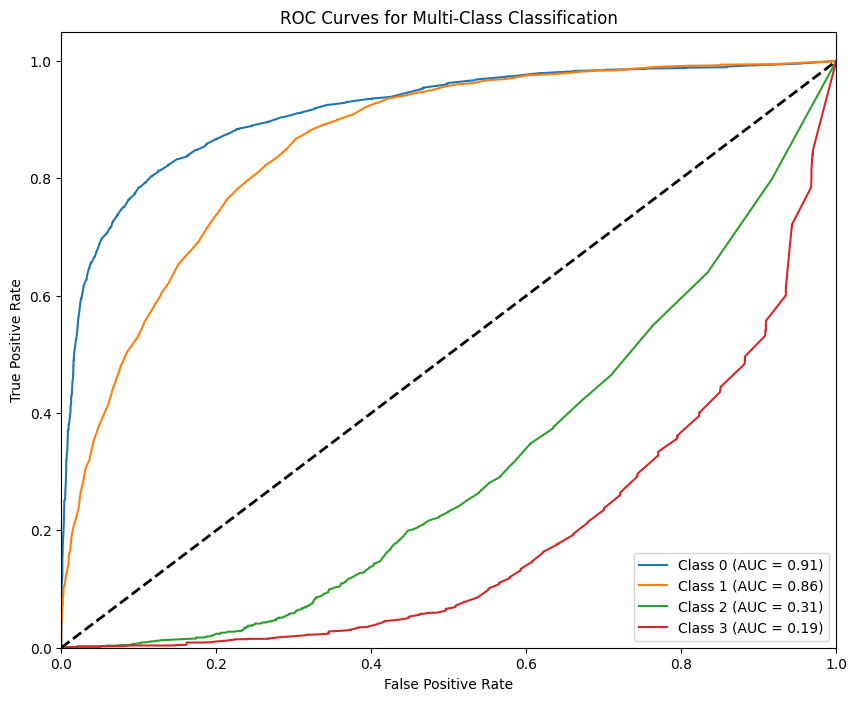

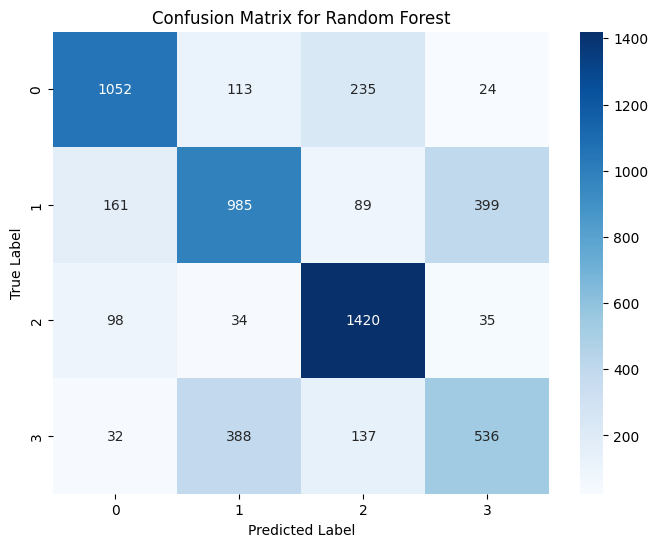

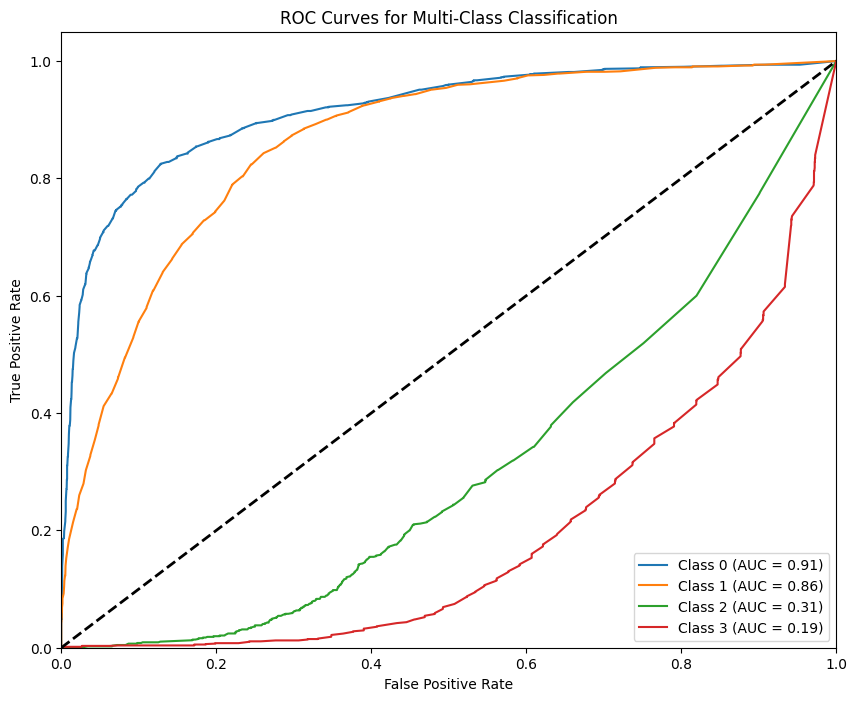

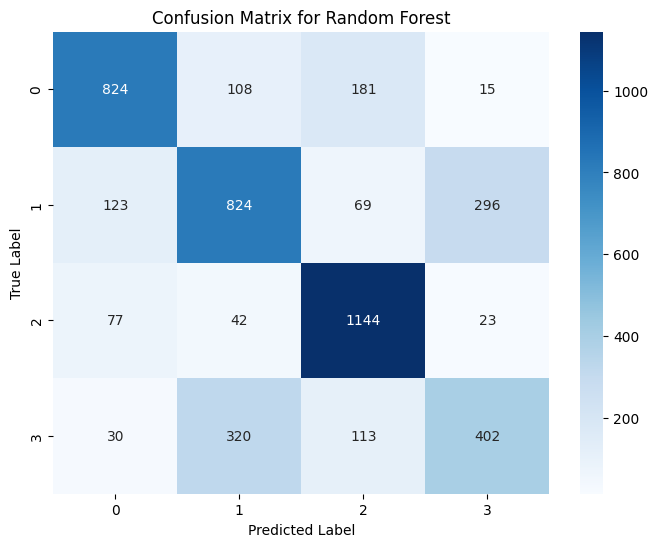

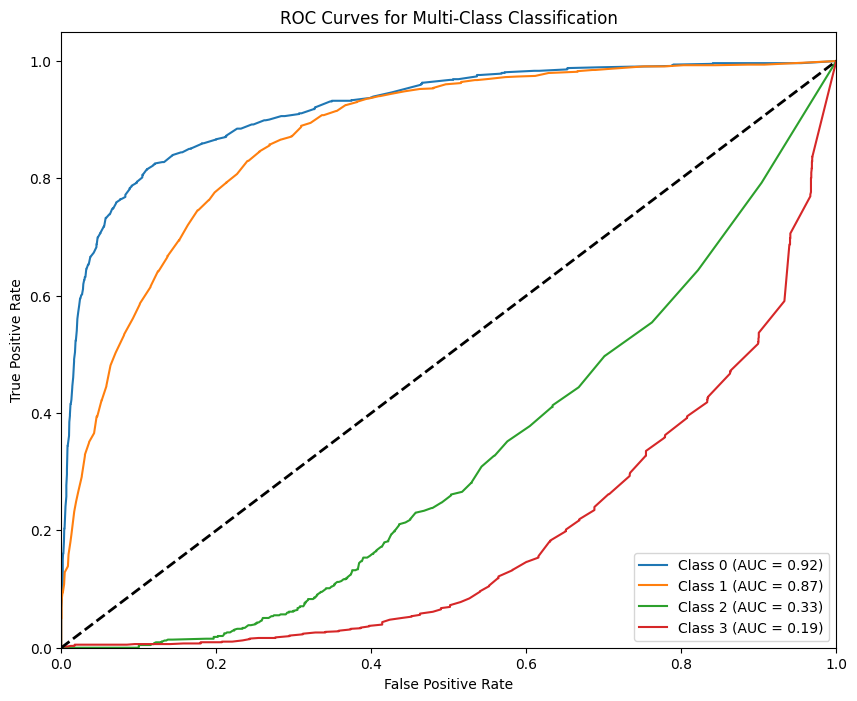

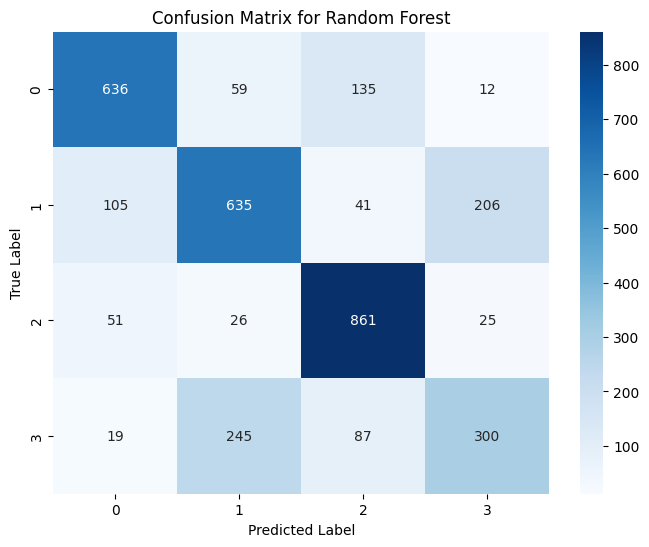

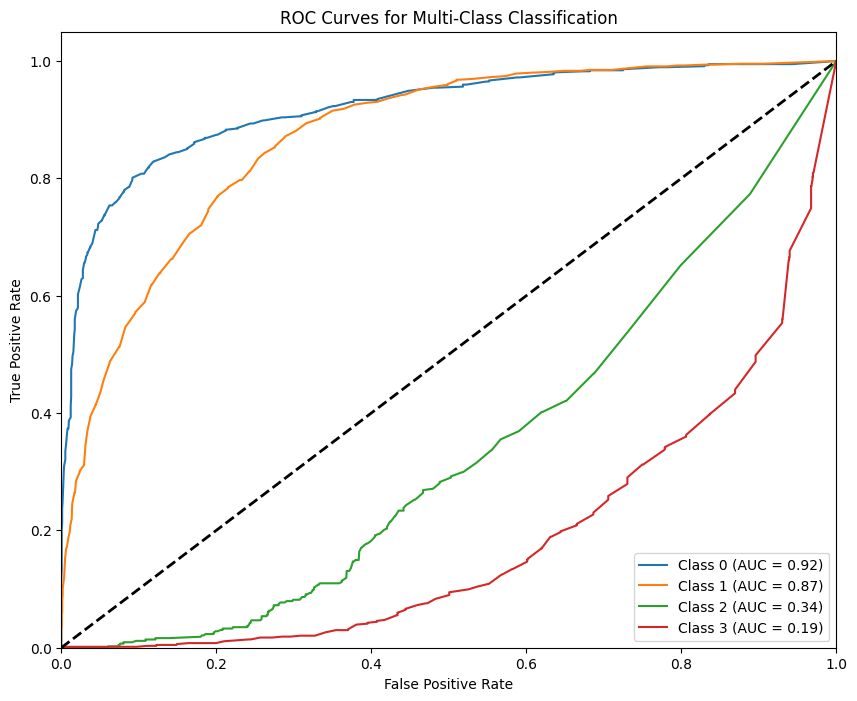

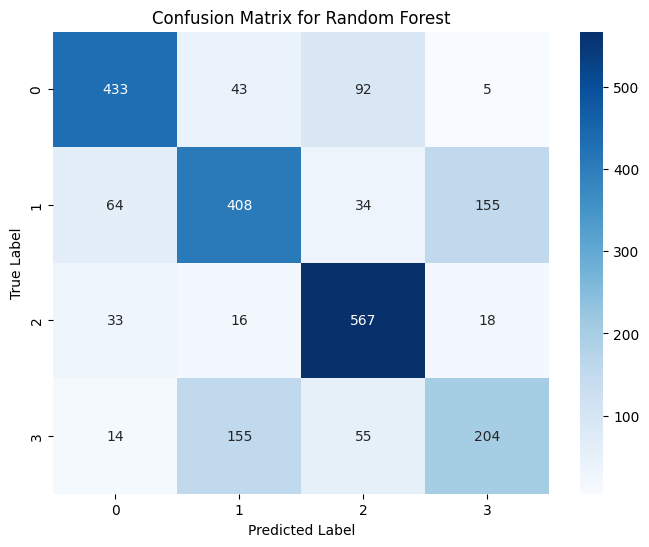


Train-Test Split: 50.0-50.0
Accuracy: 0.6958870686650401
Precision: 0.6813750621483036
Recall: 0.6816856603373496
F1-Score: 0.6793914398512009
AUC-ROC: 0.5671249609759752
Confusion Matrix: [[1052  113  235   24]
 [ 161  985   89  399]
 [  98   34 1420   35]
 [  32  388  137  536]]
MCC: 0.592002345564587
Cohen's Kappa: 0.5905943764108212

Train-Test Split: 60.0-40.0
Accuracy: 0.6957089958614681
Precision: 0.6809721458167639
Recall: 0.6782163030235437
F1-Score: 0.6772585404304312
AUC-ROC: 0.5703735255726889
Confusion Matrix: [[ 824  108  181   15]
 [ 123  824   69  296]
 [  77   42 1144   23]
 [  30  320  113  402]]
MCC: 0.590651769935934
Cohen's Kappa: 0.5892912774904763

Train-Test Split: 70.0-30.0
Accuracy: 0.7063607319198374
Precision: 0.6901871317083108
Recall: 0.6884046591236652
F1-Score: 0.686936277254391
AUC-ROC: 0.5768054665828986
Confusion Matrix: [[636  59 135  12]
 [105 635  41 206]
 [ 51  26 861  25]
 [ 19 245  87 300]]
MCC: 0.6050387038176408
Cohen's Kappa: 0.6036818513708

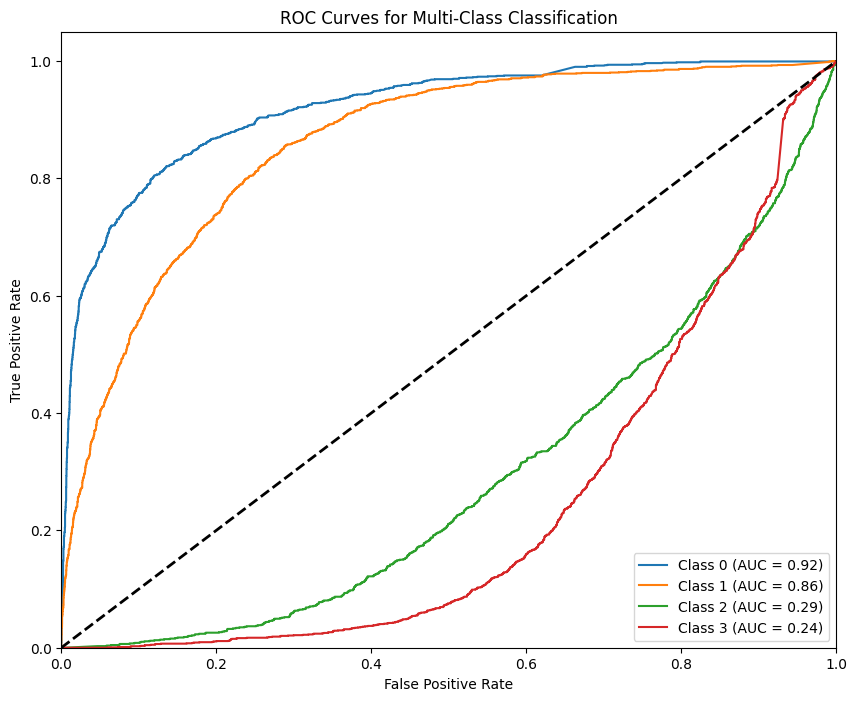

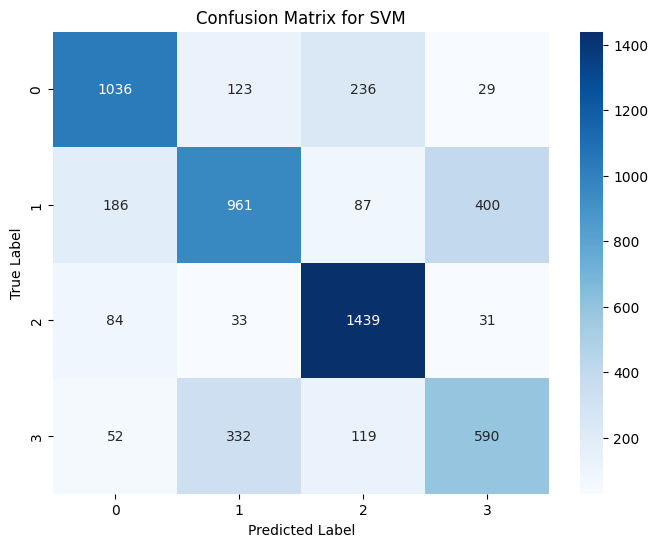

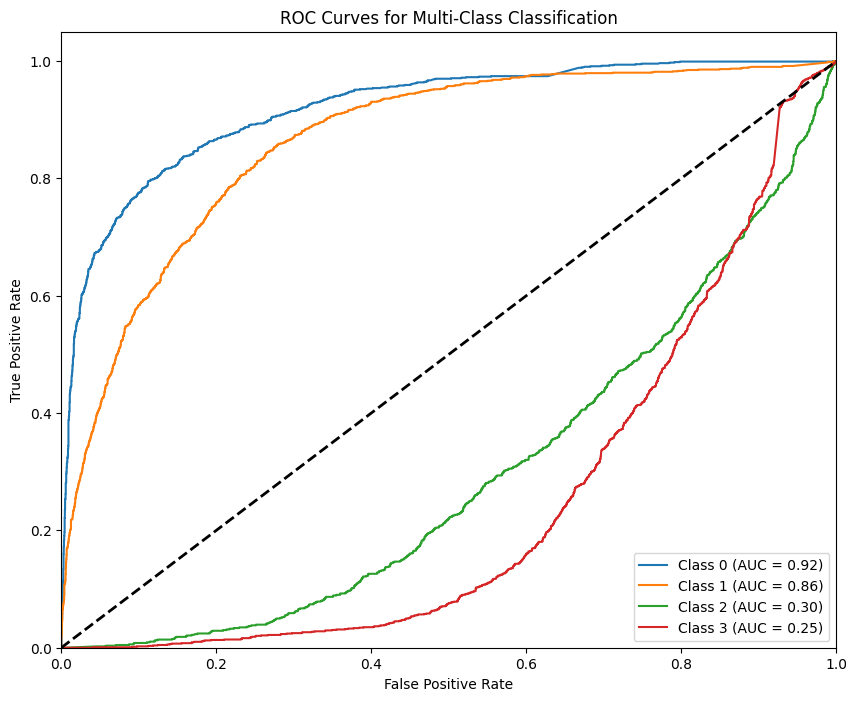

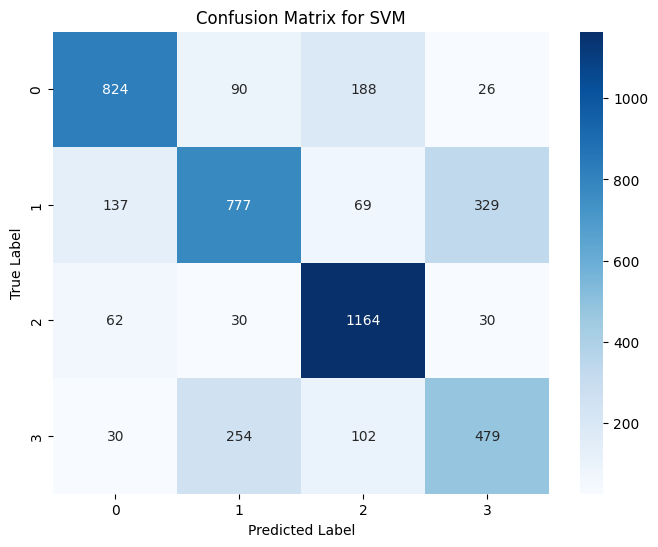

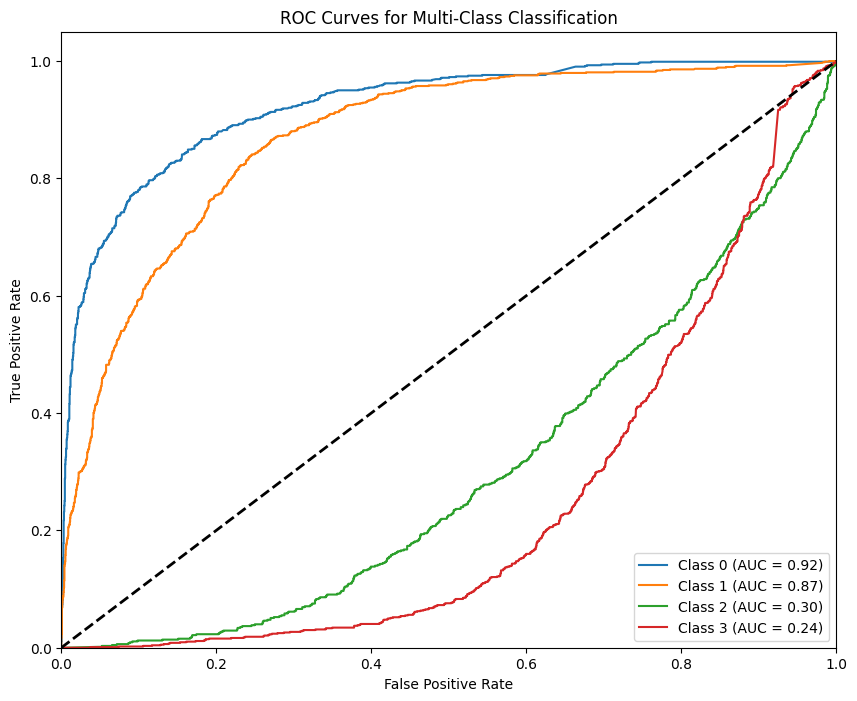

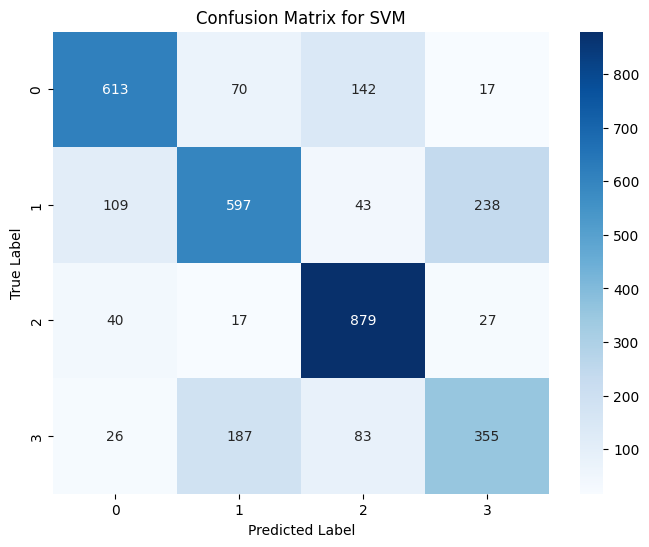

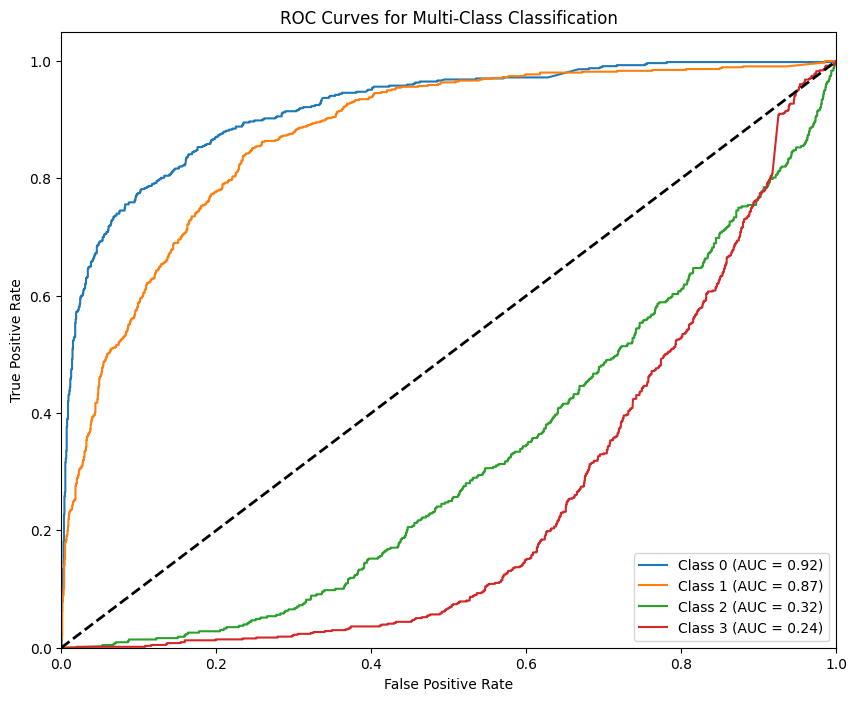

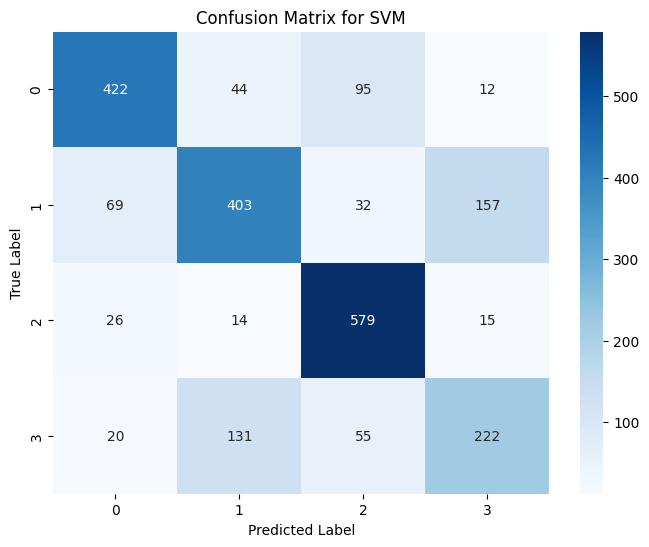


Train-Test Split: 50.0-50.0
Accuracy: 0.7016382014639247
Precision: 0.6882564945022187
Recall: 0.6905490962560901
F1-Score: 0.6871774385136116
AUC-ROC: 0.5768434694688465
Confusion Matrix: [[1036  123  236   29]
 [ 186  961   87  400]
 [  84   33 1439   31]
 [  52  332  119  590]]
MCC: 0.6004442579107777
Cohen's Kappa: 0.5988852606628665

Train-Test Split: 60.0-40.0
Accuracy: 0.7065998693095186
Precision: 0.6940676122578884
Recall: 0.6954028704840918
F1-Score: 0.6923491891531217
AUC-ROC: 0.5812902165408756
Confusion Matrix: [[ 824   90  188   26]
 [ 137  777   69  329]
 [  62   30 1164   30]
 [  30  254  102  479]]
MCC: 0.6071447179232963
Cohen's Kappa: 0.6054424403259857

Train-Test Split: 70.0-30.0
Accuracy: 0.7098460644786523
Precision: 0.6967461688617119
Recall: 0.6977448028177089
F1-Score: 0.6947978277062499
AUC-ROC: 0.5852947874500932
Confusion Matrix: [[613  70 142  17]
 [109 597  43 238]
 [ 40  17 879  27]
 [ 26 187  83 355]]
MCC: 0.611419646759229
Cohen's Kappa: 0.60966589452

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, log_loss, matthews_corrcoef, cohen_kappa_score, roc_curve, auc
)
import scipy.stats as stats
from sklearn.preprocessing import label_binarize

# Load dataset
df = pd.read_csv('/content/balanced_dataset.csv')

# Fill missing text columns with an empty string
df.fillna('', inplace=True)

# Check distribution of categories in 'status' column
status_counts = df['status'].value_counts()
print(status_counts)

# Display a random statement from each category
random_statements = {}
for category in df['status'].unique():
    random_statements[category] = df[df['status'] == category]['statement'].sample().values[0]
    print(f"{category}: {random_statements[category]}")

# Calculate word counts
df['word_count'] = df['statement'].apply(lambda x: len(str(x).split()))

# Remove outliers based on word count (using IQR method)
Q1 = df['word_count'].quantile(0.25)
Q3 = df['word_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['word_count'] >= lower_bound) & (df['word_count'] <= upper_bound)]
print(f"Dataset size after outlier removal: {df_cleaned.shape[0]}")

# Apply TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=100)  # Limit to top 100 features (words)
tfidf_matrix = tfidf.fit_transform(df_cleaned['statement'])

# Convert the TF-IDF matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Prepare data for model training
X_tfidf = tfidf_df  # Features
y = df_cleaned['status']  # Labels (mental health conditions)

# Binarize the labels for multi-class ROC-AUC curves
y_bin = label_binarize(y, classes=y.unique())

# Function to plot ROC curve for a multi-class classification problem
def plot_roc_curve(y_test_bin, y_prob, n_classes):
    plt.figure(figsize=(10, 8))
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Multi-Class Classification')
    plt.legend(loc='lower right')
    plt.show()

# Function to run experiments with different algorithms and evaluation metrics
def run_experiment(model, model_name):
    results = {}

    for split in [(0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]:
        X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=split[1], random_state=42)
        y_train_bin = label_binarize(y_train, classes=y.unique())
        y_test_bin = label_binarize(y_test, classes=y.unique())

        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Check if model supports predict_proba
        y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        auc_score = roc_auc_score(y_test_bin, y_prob, multi_class='ovr') if y_prob is not None else 'N/A'
        cm = confusion_matrix(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        kappa = cohen_kappa_score(y_test, y_pred)

        # Plot ROC curve if probability predictions are available
        if y_prob is not None:
            plot_roc_curve(y_test_bin, y_prob, n_classes=y_bin.shape[1])

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

        results[split] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'AUC-ROC': auc_score,
            'Confusion Matrix': cm,
            'MCC': mcc,
            'Cohen\'s Kappa': kappa
        }

    return results

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Multinomial NB': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True)
}

# Run experiments for all models
for name, model in models.items():
    print(f"\nRunning experiments for {name}...")
    results = run_experiment(model, name)

    # Display the results
    for split, metrics in results.items():
        print(f"\nTrain-Test Split: {split[0]*100}-{split[1]*100}")
        for metric, value in metrics.items():
            print(f"{metric}: {value}")
